In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv("TFTP_mini.csv")

In [3]:
df.head(10)

,Flow ID,SourceIP,Destination IP,Destination Posrt,Flow Duration,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Label
0,0,0,0,0,0,0,0,0,0,0,0
1,35872,0,0,0,2,0,0,0,0,0,0
2,24,0,0,2,2,0,0,0,0,0,0
3,6442,0,0,2,2,0,0,0,0,0,0
4,57,0,0,7,2,0,0,0,0,0,0
5,13930,0,0,8,2,0,0,0,0,0,0
6,26938,0,0,9,2,0,0,0,0,0,0
7,8956,0,0,12,2,0,0,0,0,0,0
8,94,0,0,13,2,0,0,0,0,0,0
9,130,0,0,17,2,0,0,0,0,0,0


In [4]:
df.describe()

,Flow ID,SourceIP,Destination IP,Destination Posrt,Flow Duration,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Label
count,201079.000000,201079.000000,201079.000000,201079.000000,201079.000000,201079.000000,201079.000000,201079.000000,201079.000000,201079.00000,201079.000000
mean,97978.333834,0.012324,0.023692,26430.354423,5614.516334,3.184216,0.095937,0.425335,0.044579,0.13988,0.001368
std,56758.292530,0.484687,0.856331,16672.836531,8908.322826,470.335663,5.267259,29.402660,2.139772,9.37505,0.036956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,48761.500000,0.000000,0.000000,12035.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,97965.000000,0.000000,0.000000,25085.000000,574.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,147033.500000,0.000000,0.000000,39853.000000,8058.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,196720.000000,47.000000,68.000000,61334.000000,36504.000000,171706.000000,726.000000,3419.000000,212.000000,1649.00000,1.000000


In [5]:
df.isnull().sum()

Flow ID                         0
SourceIP                        0
Destination IP                  0
Destination Posrt               0
Flow Duration                   0
 Total Length of Bwd Packets    0
 Fwd Packet Length Std          0
Bwd Packet Length Max           0
 Bwd Packet Length Min          0
 Bwd Packet Length Mean         0
Label                           0
dtype: int64

<AxesSubplot:>

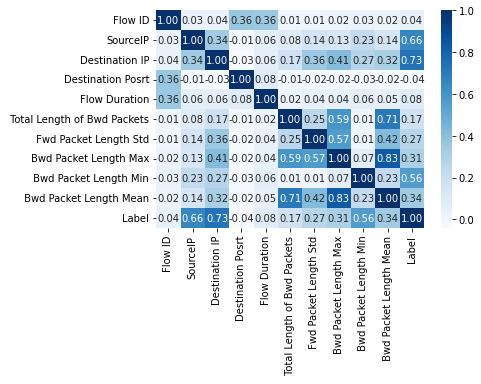

In [6]:
plt.rcParams['figure.figsize'] = (30,10)
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Blues')

In [7]:
df.shape

(201079, 11)

In [10]:
df['Label'].value_counts()

0    200804
1       275
Name: Label, dtype: int64

In [11]:
df.dtypes

Flow ID                         int64
SourceIP                        int64
Destination IP                  int64
Destination Posrt               int64
Flow Duration                   int64
 Total Length of Bwd Packets    int64
 Fwd Packet Length Std          int64
Bwd Packet Length Max           int64
 Bwd Packet Length Min          int64
 Bwd Packet Length Mean         int64
Label                           int64
dtype: object

In [12]:
X = df.drop('Label',axis=1)
X.head(5)

,Flow ID,SourceIP,Destination IP,Destination Posrt,Flow Duration,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean
0,0,0,0,0,0,0,0,0,0,0
1,35872,0,0,0,2,0,0,0,0,0
2,24,0,0,2,2,0,0,0,0,0
3,6442,0,0,2,2,0,0,0,0,0
4,57,0,0,7,2,0,0,0,0,0


In [13]:
y = df['Label']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

In [15]:
X_train.shape

(160863, 10)

In [16]:
X_test.shape

(40216, 10)

In [17]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [18]:
X_train_scaled

array([[-0.26402334, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       [ 1.41854068, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       [-1.65808942, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       ...,
       [ 1.26076342, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       [-1.17679568, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       [ 1.70876487, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166]])

In [19]:
X_test_scaled

array([[ 1.37858202, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       [ 1.35456548, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       [ 1.2372512 , -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       ...,
       [ 1.10822842, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       [ 0.60070709, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       [-0.52752367, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687]])

In [20]:
svm_classifier = svm.SVC(kernel='poly', gamma='auto', C=5)
svm_classifier

SVC(C=5, gamma='auto', kernel='poly')

In [21]:
svm_classifier.fit(X_train_scaled,y_train)

SVC(C=5, gamma='auto', kernel='poly')

In [22]:
y_pred = svm_classifier.predict(X_test_scaled)

In [23]:
y_test

180170    0
178806    0
172080    0
141177    0
81976     0
         ..
185615    0
73874     0
164661    0
135365    0
69885     0
Name: Label, Length: 40216, dtype: int64

In [24]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
svm_classifier.score(X_test_scaled,y_test)

0.9999254028247464

In [26]:
svm_classifier.score(X_train_scaled,y_train)

1.0

In [27]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[40169,     3],
       [    0,    44]], dtype=int64)

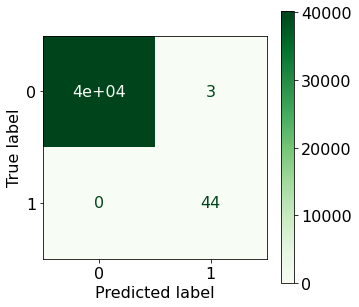

In [28]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_classifier.classes_,)
disp.plot(cmap='Greens')

In [29]:
accuracy_score(y_test,y_pred)

0.9999254028247464

In [32]:
deg = range(2,20)
test_score = []
for x in deg:
    svm_classifier = svm.SVC(kernel='poly', degree=x, gamma='auto', C=5)
    svm_classifier.fit(X_train_scaled,y_train)
    y_pred = svm_classifier.predict(X_test_scaled)
    test_score.append(svm_classifier.score(X_test_scaled,y_test))

ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.